# Wifi

In [127]:
import numpy as np
import pandas as pd

## Importation des données

In [128]:
dtype = {'Code Site': 'category', 'Nom du site': str, 'Code postal': 'category', "Type d'appareil":'category', 'Nombre de borne': int, 'Adresse': str}

In [131]:
df = pd.read_csv("./data/paris-wi-fi-utilisation-des-hotspots-paris-wi-fi.csv", sep=";", dtype=dtype)

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Remove duplicate columns**

In [132]:
del df['Date heure fin']
del df['Donnée entrante (Octet)']
del df['Donnée sortante (Octet)']
del df['Code postal.1']
del df['Nom du site.1']
del df['Temps de session en secondes']

**Remove useless columns**

**Convert time columns**

In [133]:
df['Date heure début'] = pd.to_datetime(df['Date heure début'])

## Observation des données

In [134]:
len(df)

1627738

In [135]:
df.columns

Index(['Code Site', 'Date heure début', 'Temps de sessions en minutes',
       'Nom du site', 'Code postal', 'Type d'appareil',
       'Constructeur appareil', 'Version système exploitation',
       'Version navigateur', 'Donnée entrante (MégaOctet)',
       'Donnée sortante (MégaOctet)', 'Paquets entrants', 'Paquets sortants',
       'Langue utilisateur', 'geo_shape', 'geo_point_2d', 'Etat du site',
       'Adresse', 'Nombre de bornes'],
      dtype='object')

In [136]:
df.sample(10)

,Code Site,Date heure début,Temps de sessions en minutes,Nom du site,Code postal,Type d'appareil,Constructeur appareil,Version système exploitation,Version navigateur,Donnée entrante (MégaOctet),Donnée sortante (MégaOctet),Paquets entrants,Paquets sortants,Langue utilisateur,geo_shape,geo_point_2d,Etat du site,Adresse,Nombre de bornes
1297417,PW0190,2019-09-20 11:44:00,7.4,PORT SOLFERINO-BERGES RG,75007,Mobile,Samsung,inconnu,Chrome 77.0,1.8,1.9,3151,3068,Espagnol,"{""type"": ""Point"", ""coordinates"": [2.325065434,...","48.8611484589,2.32506543396",Fermé pour travaux,PORT DE SOLFERINO,3.0
773982,PW0049,2021-09-03 09:51:05,22.6,MED VIOLETTE LEDUC,75011,Mobile,autre,inconnu,Chrome 92.0,7.3,1.0,6103,6295,Français,"{""type"": ""Point"", ""coordinates"": [2.383960071,...","48.8515955528,2.38396007097",Opérationnel,18 RUE FAIDHERBE,4.0
913414,PW0187,2020-12-04 11:56:37,58.5,MVAC 20,75020,Mobile,autre,inconnu,Chrome 86.0,77.8,9.4,65147,69179,Français,"{""type"": ""Point"", ""coordinates"": [2.3987890642...","48.8627043264,2.39878906422",Opérationnel,18 RUE RAMUS,2.0
498927,PW0101,2019-10-21 15:11:09,16.6,CS HENRY DE MONTHERLAND,75016,Mobile,autre,Android 7.1.2,Chrome 77.0,7.4,1.1,5849,6412,Français,"{""type"": ""Point"", ""coordinates"": [2.2721208538...","48.8675228068,2.27212085381",Opérationnel,30-32 BOULEVARD LANNES,1.0
22253,PW0099,2020-08-07 18:43:00,1.0,GYM REUILLY,75012,Mobile,Apple,iOS 13.5.1,Safari unknown,2.5,0.4,1871,2604,Français,"{""type"": ""Point"", ""coordinates"": [2.3891714419...","48.8417054788,2.38917144192",Opérationnel,11 RUE ANTOINE JULIEN HENARD,1.0
1542358,PW0175,2021-06-22 10:40:22,13.2,JARD DU TROCADERO,75016,Mobile,Apple,iOS 14.4.2,Safari unknown,13.2,1.7,13605,12466,Portugais,"{""type"": ""Point"", ""coordinates"": [2.2893499444...","48.8609372147,2.28934994437",Opérationnel,1 PLACE DU ONZE NOVEMBRE 1918,1.0
79755,PW0009,2021-08-05 11:08:57,58.5,BIB VACLAV HAVEL,75018,Mobile,Apple,iOS 14.6,Safari unknown,164.8,11.0,123223,124601,Allemand,"{""type"": ""Point"", ""coordinates"": [2.3632099736...","48.8901061541,2.36320997363",Opérationnel,26B RUE PAJOL,4.0
1268782,PW0194,2020-10-05 21:19:00,120.8,JARD BERGES DU CANAL ST MARTIN,75010,Mobile,Samsung,Android 8.0.0,Chrome 85.0,283.5,14.4,192773,171430,Français,"{""type"": ""Point"", ""coordinates"": [2.3672066687...","48.8801112154,2.36720666871",Opérationnel,150 QUAI DE VALMY,1.0
967010,PW0211,2019-11-04 12:10:51,10.2,MUSEE ART MODERNE,75016,Mobile,Apple,iOS 13.2,Safari unknown,3.0,0.4,1884,3648,Polonais,"{""type"": ""Point"", ""coordinates"": [2.2969973367...","48.8647101823,2.29699733667",Opérationnel,11 AVENUE DU PRESIDENT WILSON,11.0
805075,PW0082,2021-03-09 10:10:49,83.3,CS JEAN DAME,75002,Mobile,Samsung,inconnu,Chrome 88.0,29.7,20.0,36052,38377,Français,"{""type"": ""Point"", ""coordinates"": [2.3455065053...","48.8665683485,2.34550650532",Opérationnel,17 RUE LEOPOLD BELLAN,1.0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627738 entries, 0 to 1627737
Data columns (total 19 columns):
Code Site                       1612801 non-null category
Date heure début                1627738 non-null datetime64[ns]
Temps de sessions en minutes    1627738 non-null float64
Nom du site                     1627738 non-null object
Code postal                     1624015 non-null category
Type d'appareil                 1627738 non-null category
Constructeur appareil           1627738 non-null object
Version système exploitation    1551296 non-null object
Version navigateur              1585808 non-null object
Donnée entrante (MégaOctet)     1627738 non-null float64
Donnée sortante (MégaOctet)     1627738 non-null float64
Paquets entrants                1627738 non-null int64
Paquets sortants                1627738 non-null int64
Langue utilisateur              1567714 non-null object
geo_shape                       1608592 non-null object
geo_point_2d                    

### Removing rows with missing values

In [139]:
df = df.dropna(how='any')

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1432685 entries, 0 to 1627737
Data columns (total 19 columns):
Code Site                       1432685 non-null category
Date heure début                1432685 non-null datetime64[ns]
Temps de sessions en minutes    1432685 non-null float64
Nom du site                     1432685 non-null object
Code postal                     1432685 non-null category
Type d'appareil                 1432685 non-null category
Constructeur appareil           1432685 non-null object
Version système exploitation    1432685 non-null object
Version navigateur              1432685 non-null object
Donnée entrante (MégaOctet)     1432685 non-null float64
Donnée sortante (MégaOctet)     1432685 non-null float64
Paquets entrants                1432685 non-null int64
Paquets sortants                1432685 non-null int64
Langue utilisateur              1432685 non-null object
geo_shape                       1432685 non-null object
geo_point_2d                    

In [141]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [142]:
df.describe()

,Temps de sessions en minutes,Donnée entrante (MégaOctet),Donnée sortante (MégaOctet),Paquets entrants,Paquets sortants,Nombre de bornes
count,1432685.0,1432685.0,1432685.0,1432685.0,1432685.0,1432685.0
mean,38.8,62.3,9.4,52355.5,52311.9,3.2
std,40.0,110.0,34.3,100042.6,107873.0,3.9
min,0.0,0.0,0.0,0.0,0.0,1.0
25%,7.0,4.8,0.7,4734.0,5212.0,1.0
50%,21.8,19.7,2.7,18082.0,18854.0,2.0
75%,60.8,68.0,8.5,59140.0,58924.0,4.0
max,1429.0,4307.4,3552.9,11624359.0,11664547.0,32.0


In [143]:
df.corr().style.background_gradient()

,Temps de sessions en minutes,Donnée entrante (MégaOctet),Donnée sortante (MégaOctet),Paquets entrants,Paquets sortants,Nombre de bornes
Temps de sessions en minutes,1,0.575798,0.243029,0.526109,0.473802,0.0769296
Donnée entrante (MégaOctet),0.575798,1,0.28346,0.82805,0.733852,0.0259292
Donnée sortante (MégaOctet),0.243029,0.28346,1,0.51677,0.594034,0.0229426
Paquets entrants,0.526109,0.82805,0.51677,1,0.901399,0.0222113
Paquets sortants,0.473802,0.733852,0.594034,0.901399,1,0.0237234
Nombre de bornes,0.0769296,0.0259292,0.0229426,0.0222113,0.0237234,1


### a. Différents sites

In [51]:
df_sites = df.groupby('Code Site').count()['Date heure début']
df_sites.describe()

count     263.0
mean     6132.3
std      7363.4
min         6.0
25%      1722.5
50%      3680.0
75%      7544.5
max     58339.0
Name: Date heure début, dtype: float64

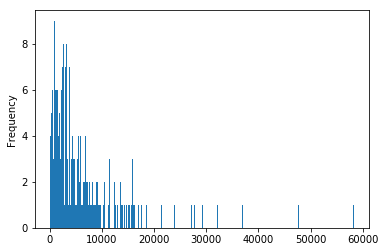

In [55]:
df_sites.plot.hist(bins = 400)

### b. Getting week days

In [145]:
a = df['Date heure début']

In [148]:
a[0].weekday()

6

In [152]:
df['Jour'] = df['Date heure début'].apply(lambda x: x.weekday())

### c. Add a category for time during the day